In [1]:
'''
Where are our enhancers? De novo? Tag counts?
'''

'\nWhere are our enhancers? De novo? Tag counts?\n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [3]:
data = pd.io.parsers.read_csv('data/union_peaks_five_conditions.txt', 
                                    sep='\t', 
                                    header=0)

data = data.fillna(0)

# Rename our columns of interest
labels = ['No Peptide', '10uM K99A', '100uM K99A', '0.1uM PCC', '10uM PCC']
last_five_columns = [labels[3], labels[2], labels[1], labels[4], labels[0]]

data.columns = data.columns[:-5].tolist() + last_five_columns

In [4]:
# Enhancers only
data = all_data[all_data['Annotation'].str.contains('promoter') == False]
#data = data[data['Distance to TSS'] < 5000]
data.describe()

,Start,End,Peak Score,Focus Ratio/Region Size,Distance to TSS,Entrez ID,0.1uM PCC,100uM K99A,10uM K99A,10uM PCC,No Peptide
count,2.897800e+04,2.897800e+04,28978.000000,28978.000000,28978.00000,2.897800e+04,28978.000000,28978.000000,28978.000000,28978.000000,28978.000000
mean,7.722258e+07,7.722403e+07,54.371921,20.880700,8128.82183,4.689851e+06,56.501731,43.539125,55.960592,46.649361,57.254462
std,4.381323e+07,4.381325e+07,76.547936,15.428938,67883.83422,2.099355e+07,83.546789,62.847149,82.808246,66.533816,85.856600
min,1.349500e+04,1.424900e+04,3.640000,1.850000,-1035060.00000,1.130300e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.977131e+07,3.977204e+07,11.300000,9.390000,-4451.75000,2.141500e+04,11.110000,9.610000,10.490000,10.400000,10.850000
50%,7.564052e+07,7.564156e+07,28.800000,16.187000,1322.00000,7.168300e+04,28.400000,23.190000,27.830000,24.260000,29.200000
75%,1.107583e+08,1.107589e+08,71.100000,28.582250,18049.00000,2.179912e+05,72.860000,55.420000,72.990000,60.070000,74.260000
max,1.952412e+08,1.952419e+08,3339.000000,471.500000,1023622.00000,1.029027e+08,3804.730000,2789.860000,3597.540000,2997.390000,3549.240000


In [59]:
min_tags = 30

In [64]:
# Activated only?
fold = 2
act = labels[-1:]
denovo = data[(data[act].max(axis=1) > data[labels[0]]*fold) &
              (data[act].max(axis=1) > min_tags)]
print('Activated but not {} enhancers'.format(labels[0]), len(denovo))
denovo[labels].describe()

Activated but not No Peptide enhancers 106


,No Peptide,10uM K99A,100uM K99A,0.1uM PCC,10uM PCC
count,106.000000,106.000000,106.000000,106.000000,106.000000
mean,26.580094,55.793208,56.592453,71.420377,72.075094
std,29.874847,62.879144,59.397740,79.163759,71.749693
min,5.010000,13.230000,16.400000,12.970000,30.040000
25%,11.887500,23.835000,26.160000,32.720000,33.645000
50%,18.360000,33.985000,37.890000,43.220000,46.210000
75%,32.330000,66.605000,66.170000,80.735000,85.782500
max,271.990000,509.110000,481.850000,660.050000,601.910000


In [61]:
# Groups of enhancers of interest:
# de novo, next to act sig, next to bottom 10%
denovo.to_csv('output/subgroups/high_affinity_denovo_enhancers.txt', 
              sep='\t', header=True, index=False)

In [21]:
# Get genes from PC1
top_genes = pd.io.parsers.read_csv('../rna/unsupervised/output/clusters/pca_pc1_top_rna_and.txt', 
                                    sep='\t', 
                                    header=0, index_col=0)
bottom_genes = pd.io.parsers.read_csv('../rna/unsupervised/output/clusters/pca_pc1_bottom_rna_and.txt', 
                                    sep='\t', 
                                    header=0, index_col=0)
top_genes.head()

,chr,start,end,strand,Length,Copies,Annotation/Divergence,0-1uM-PCC-24h-1,100uM-K99A-24h-1,10uM-K99A-24h-1,...,No-Peptide-24h-std,10uM-K99A-24h,10uM-K99A-24h-std,100uM-K99A-24h,100uM-K99A-24h-std,0-1uM-PCC-24h,0-1uM-PCC-24h-std,10uM-PCC-24h,10uM-PCC-24h-std,gene_name
id,,,,,,,,,,,,,,,,,,,,,
NM_011970,chr4,126677643,126709715,+,839,1,Psmb2|AU045357|AW108089|C7-I|D4Wsu33e|HC7-I|RP...,112.787,101.696,75.949,...,7.967679,62.1730,19.482206,89.469,17.291589,95.4015,24.586810,110.1775,12.271838,Psmb2
NM_010480,chr12,110691036,110696395,-,2838,1,Hsp90aa1|86kDa|89kDa|AL024080|AL024147|Hsp86-1...,87.906,72.207,46.894,...,2.234457,31.8850,21.225931,60.480,16.584482,67.5635,28.768639,64.5290,22.474682,Hsp90aa1
NM_001289612,chr1,36778984,36782820,+,1335,1,Zap70|Srk|ZAP-70|mrtle|mur|-|1 A4-C1|1 15.41 c...,114.454,79.366,54.134,...,29.592419,42.3120,16.718833,68.472,15.406443,83.8025,43.347767,100.2340,26.232247,Zap70
NM_021526,chr2,61711694,61800376,+,1527,1,Psmd14|2610312C03Rik|3200001M20Rik|AA986732|Pa...,91.061,97.880,62.942,...,6.408509,47.1205,22.374980,75.448,31.723639,75.9705,21.341190,87.1425,25.766264,Psmd14
NM_145620,chr9,106477309,106485415,+,1520,1,Rrp9|55kDa|D19435|D9Wsu10e|Rnu3ip2|U3-55k|-|9 ...,89.606,74.092,47.922,...,6.967830,29.8975,25.490492,54.652,27.492312,62.3280,38.576918,74.0660,27.700201,Rrp9


In [22]:
top_enh = data[data['Gene Name'].isin(top_genes['gene_name'])]
top_enh.to_csv('output/subgroups/enhancers_near_top_pc1_genes.txt', 
              sep='\t', header=True, index=False)
top_enh.describe()

,Start,End,Peak Score,Focus Ratio/Region Size,Distance to TSS,Entrez ID,0.1uM PCC,100uM K99A,10uM K99A,10uM PCC,No Peptide
count,6.920000e+02,6.920000e+02,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,7.839221e+07,7.839422e+07,81.257341,20.146163,3378.856936,50241.502890,88.456965,67.261488,83.909162,74.252211,77.601084
std,4.265315e+07,4.265313e+07,103.253149,13.236290,46792.429462,64977.897427,117.178755,86.211824,111.293063,95.364400,106.473799
min,3.833996e+06,3.836788e+06,4.580000,3.187000,-533648.000000,11569.000000,1.850000,0.570000,1.370000,1.730000,0.000000
25%,4.645953e+07,4.646003e+07,13.300000,10.323500,-3984.500000,15806.500000,14.200000,12.440000,11.860000,13.145000,10.010000
50%,6.988931e+07,6.989241e+07,46.450000,16.891500,1851.500000,19967.500000,46.620000,39.020000,46.535000,42.170000,45.470000
75%,1.205864e+08,1.205894e+08,112.175000,26.025750,13448.500000,66129.500000,117.782500,89.500000,112.907500,100.220000,104.290000
max,1.853666e+08,1.853670e+08,687.300000,71.767000,195042.000000,619547.000000,787.250000,593.260000,722.150000,646.380000,848.510000


In [23]:
bottom_enh = data[data['Gene Name'].isin(bottom_genes['gene_name'])]
bottom_enh.to_csv('output/subgroups/enhancers_near_bottom_pc1_genes.txt', 
              sep='\t', header=True, index=False)
bottom_enh.describe()

,Start,End,Peak Score,Focus Ratio/Region Size,Distance to TSS,Entrez ID,0.1uM PCC,100uM K99A,10uM K99A,10uM PCC,No Peptide
count,8.610000e+02,8.610000e+02,861.000000,861.000000,861.000000,8.610000e+02,861.000000,861.000000,861.000000,861.000000,861.000000
mean,7.887313e+07,7.887524e+07,87.307642,19.702344,547.494774,2.954368e+05,91.738258,71.731603,92.170732,73.511022,100.524472
std,4.300127e+07,4.300137e+07,140.294126,14.960739,46780.102826,4.816460e+06,151.121878,114.299635,152.752888,115.753876,169.558659
min,3.171820e+06,3.172616e+06,4.470000,2.520000,-615792.000000,1.143300e+04,0.000000,0.570000,0.910000,1.160000,0.000000
25%,4.457269e+07,4.457319e+07,12.700000,9.380000,-8279.000000,1.619700e+04,12.350000,10.750000,12.770000,11.550000,12.510000
50%,7.923134e+07,7.923184e+07,31.400000,15.007000,1826.000000,2.037500e+04,32.720000,27.710000,32.850000,27.730000,34.210000
75%,1.108845e+08,1.108850e+08,98.600000,25.670000,14358.000000,7.403900e+04,102.500000,80.870000,104.010000,79.140000,108.460000
max,1.932074e+08,1.932094e+08,1331.900000,129.747000,188471.000000,1.000415e+08,1394.200000,1081.900000,1431.080000,1021.850000,1734.570000


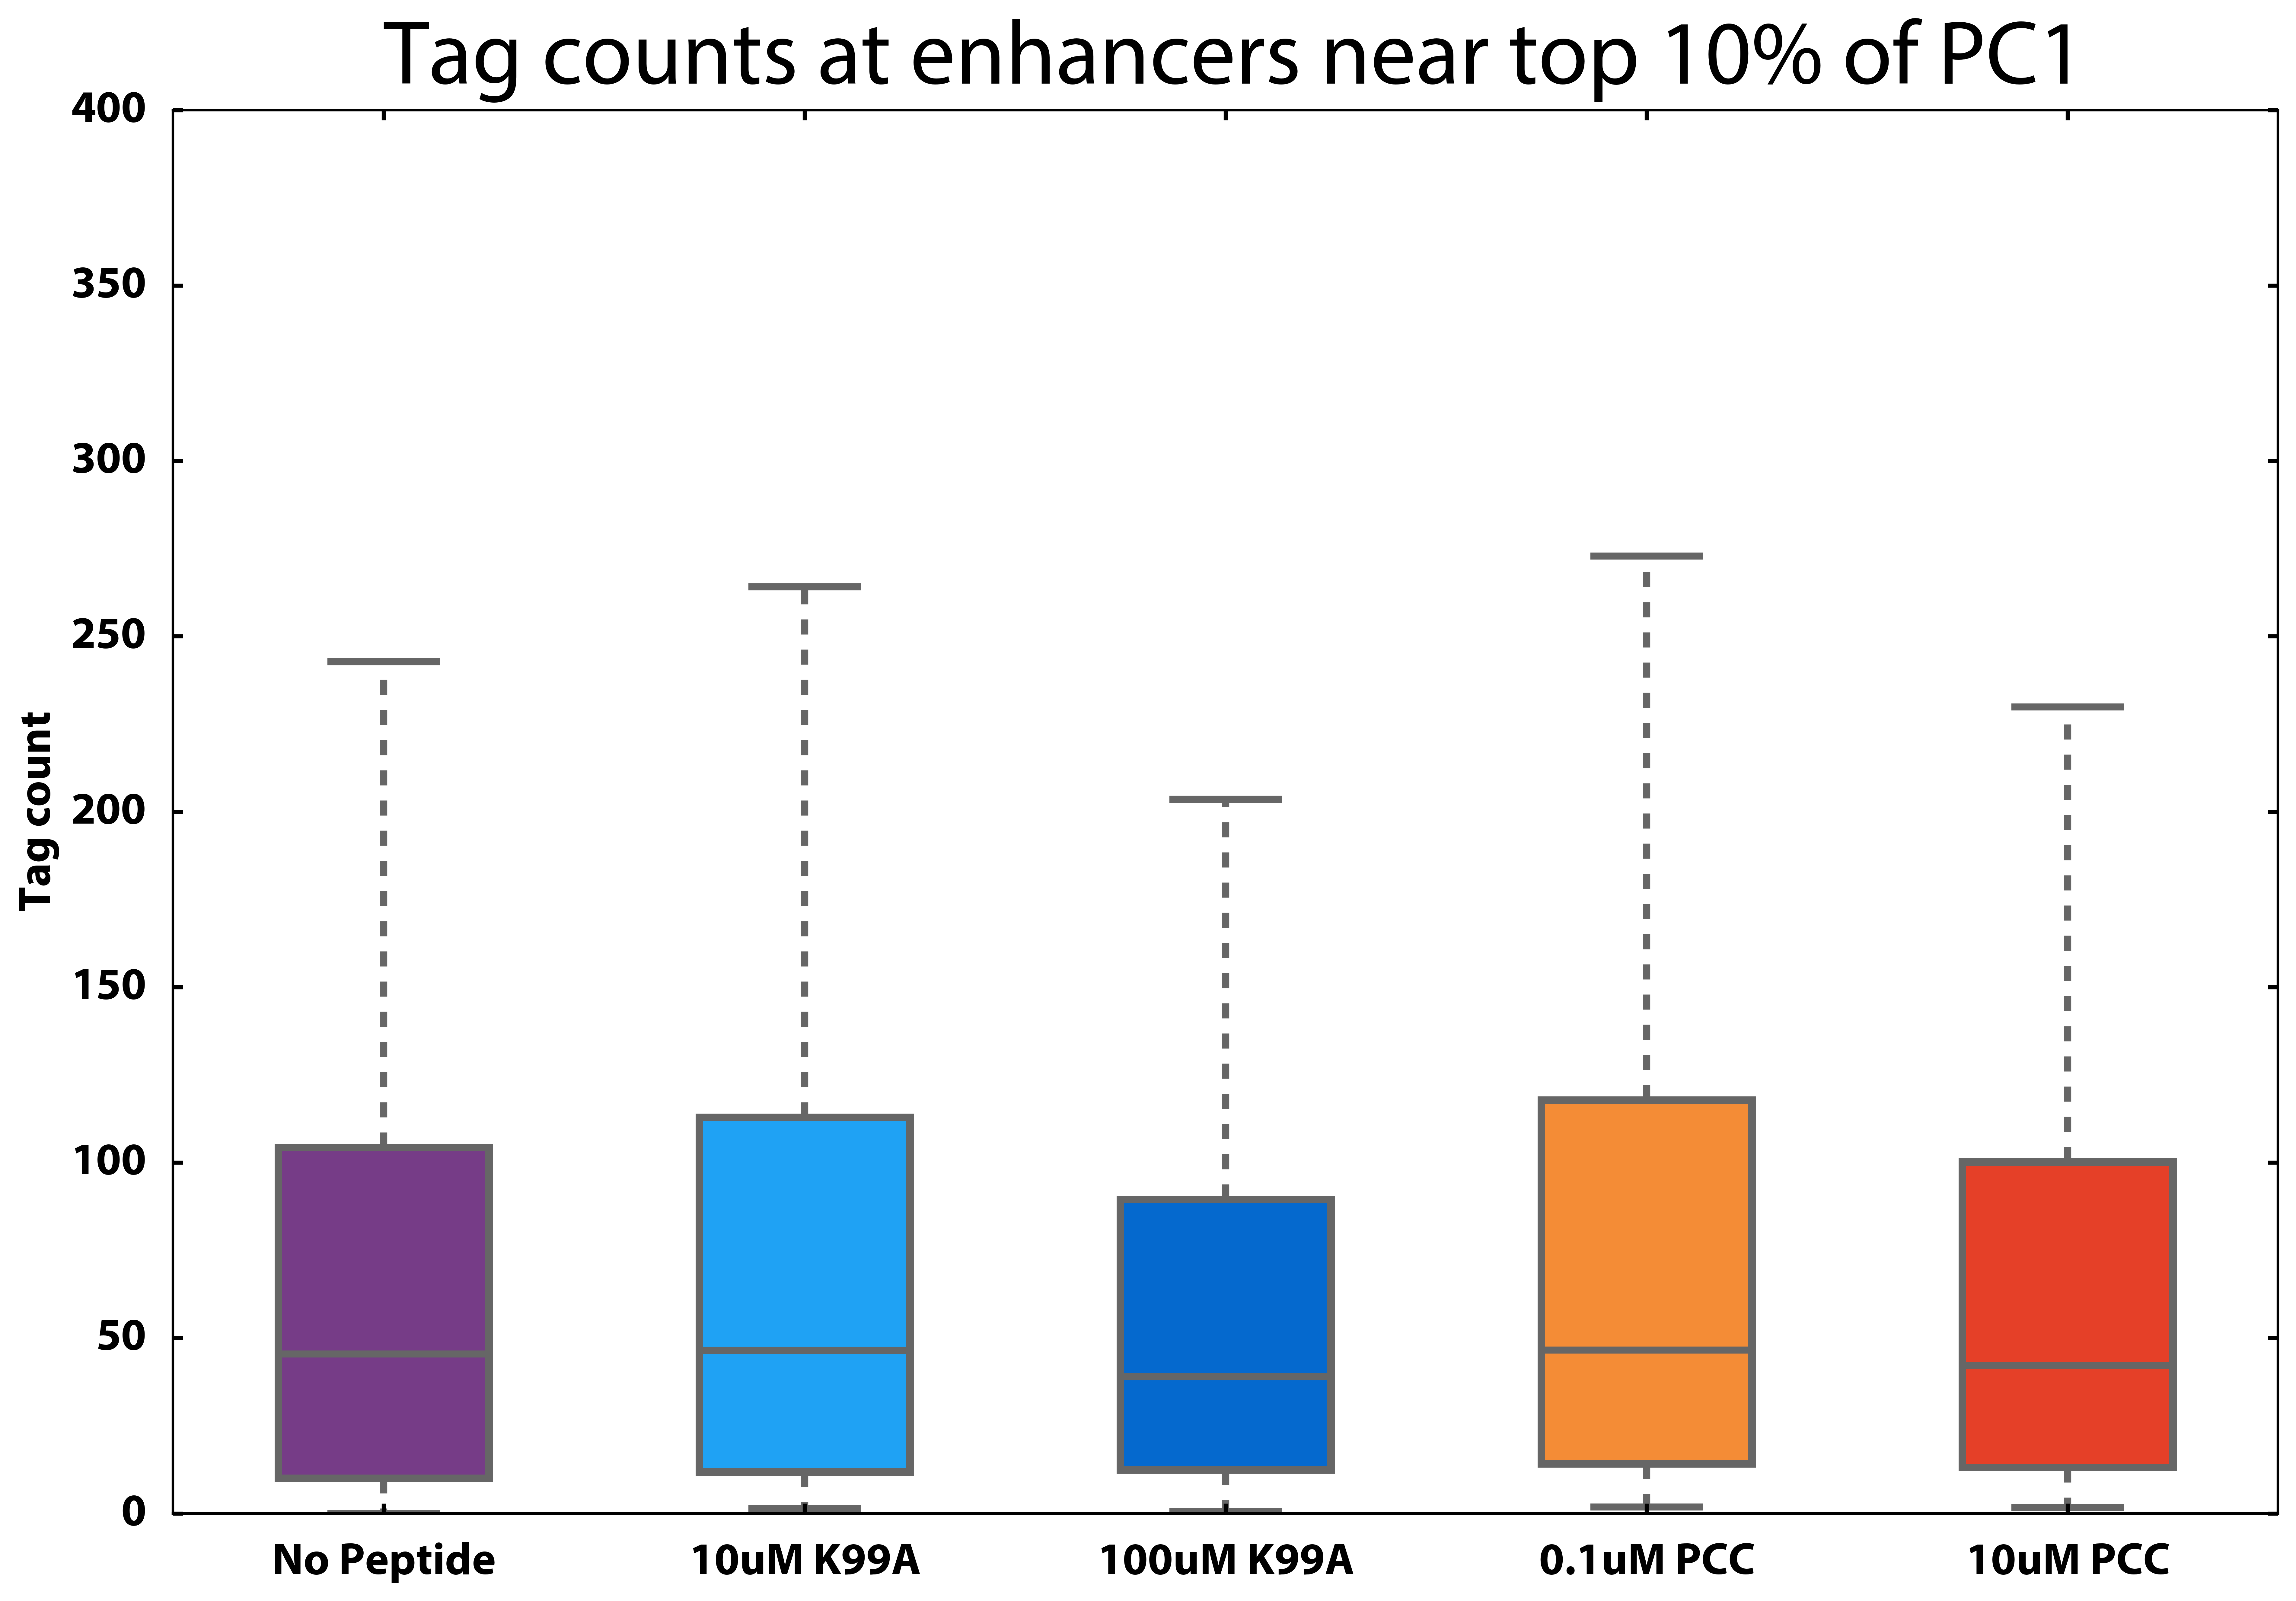

In [24]:
# Box plots of conditions
bp = plt.boxplot([top_enh[label] for label in labels], patch_artist=True, sym='')

# Colors.
for i in range(0, len(labels)):
    outline_col = '#666666'
    plt.setp(bp['boxes'][i], edgecolor=outline_col)
    plt.setp(bp['boxes'][i], linewidth=3)
    plt.setp(bp['boxes'][i], facecolor=colorset[i])
    plt.setp(bp['medians'][i], color=outline_col)
    plt.setp(bp['whiskers'][i*2], color=outline_col)
    plt.setp(bp['whiskers'][i*2+1], color=outline_col)
    plt.setp(bp['caps'][i*2], color=outline_col)
    plt.setp(bp['caps'][i*2+1], color=outline_col)

    

plt.ylim([0,400])

plt.ylabel('Tag count')
plt.xticks(range(1,len(labels)+1), labels)

title = 'Tag counts at enhancers near top 10% of PC1'
plt.title(title, y=1.01)

plt.savefig('figures/{}'.format(title.replace(' ','_')),
            bbox_inches='tight')

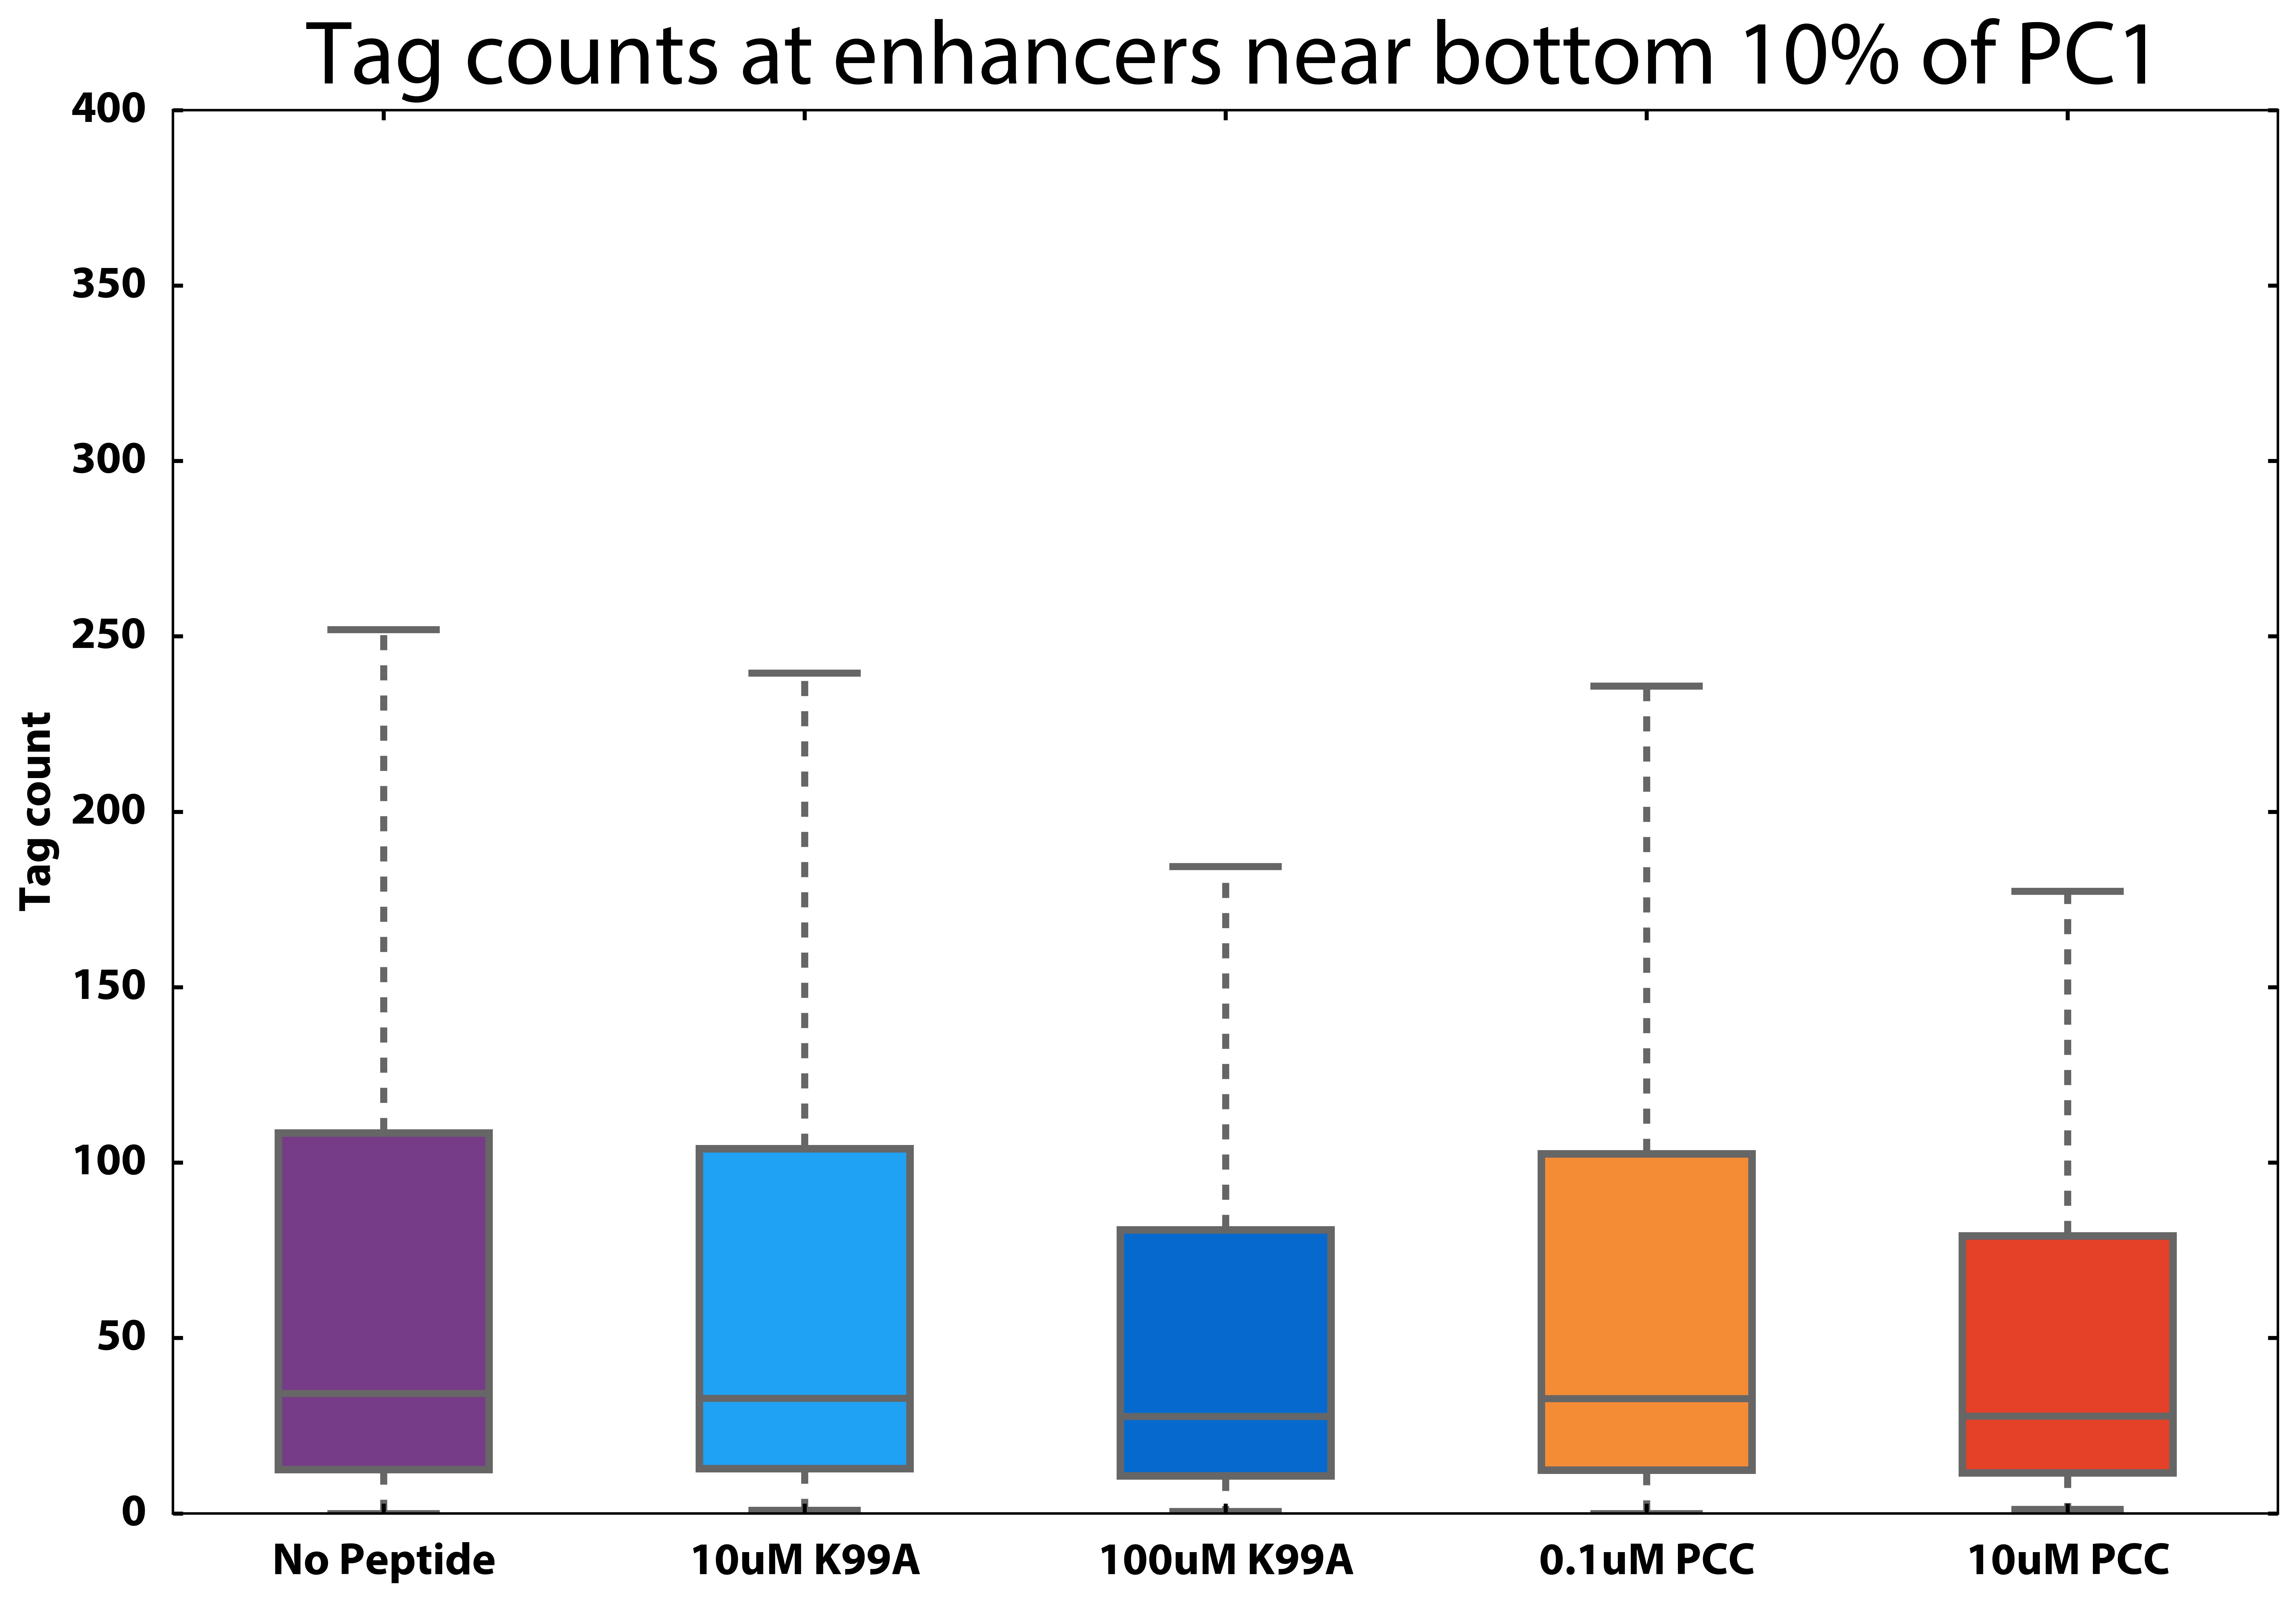

In [25]:
# Box plots of conditions
bp = plt.boxplot([bottom_enh[label] for label in labels], patch_artist=True, sym='')

# Colors.
for i in range(0, len(labels)):
    outline_col = '#666666'
    plt.setp(bp['boxes'][i], edgecolor=outline_col)
    plt.setp(bp['boxes'][i], linewidth=3)
    plt.setp(bp['boxes'][i], facecolor=colorset[i])
    plt.setp(bp['medians'][i], color=outline_col)
    plt.setp(bp['whiskers'][i*2], color=outline_col)
    plt.setp(bp['whiskers'][i*2+1], color=outline_col)
    plt.setp(bp['caps'][i*2], color=outline_col)
    plt.setp(bp['caps'][i*2+1], color=outline_col)

    

plt.ylim([0,400])

plt.ylabel('Tag count')
plt.xticks(range(1,len(labels)+1), labels)

title = 'Tag counts at enhancers near bottom 10% of PC1'
plt.title(title, y=1.01)

plt.savefig('figures/{}'.format(title.replace(' ','_')),
            bbox_inches='tight')

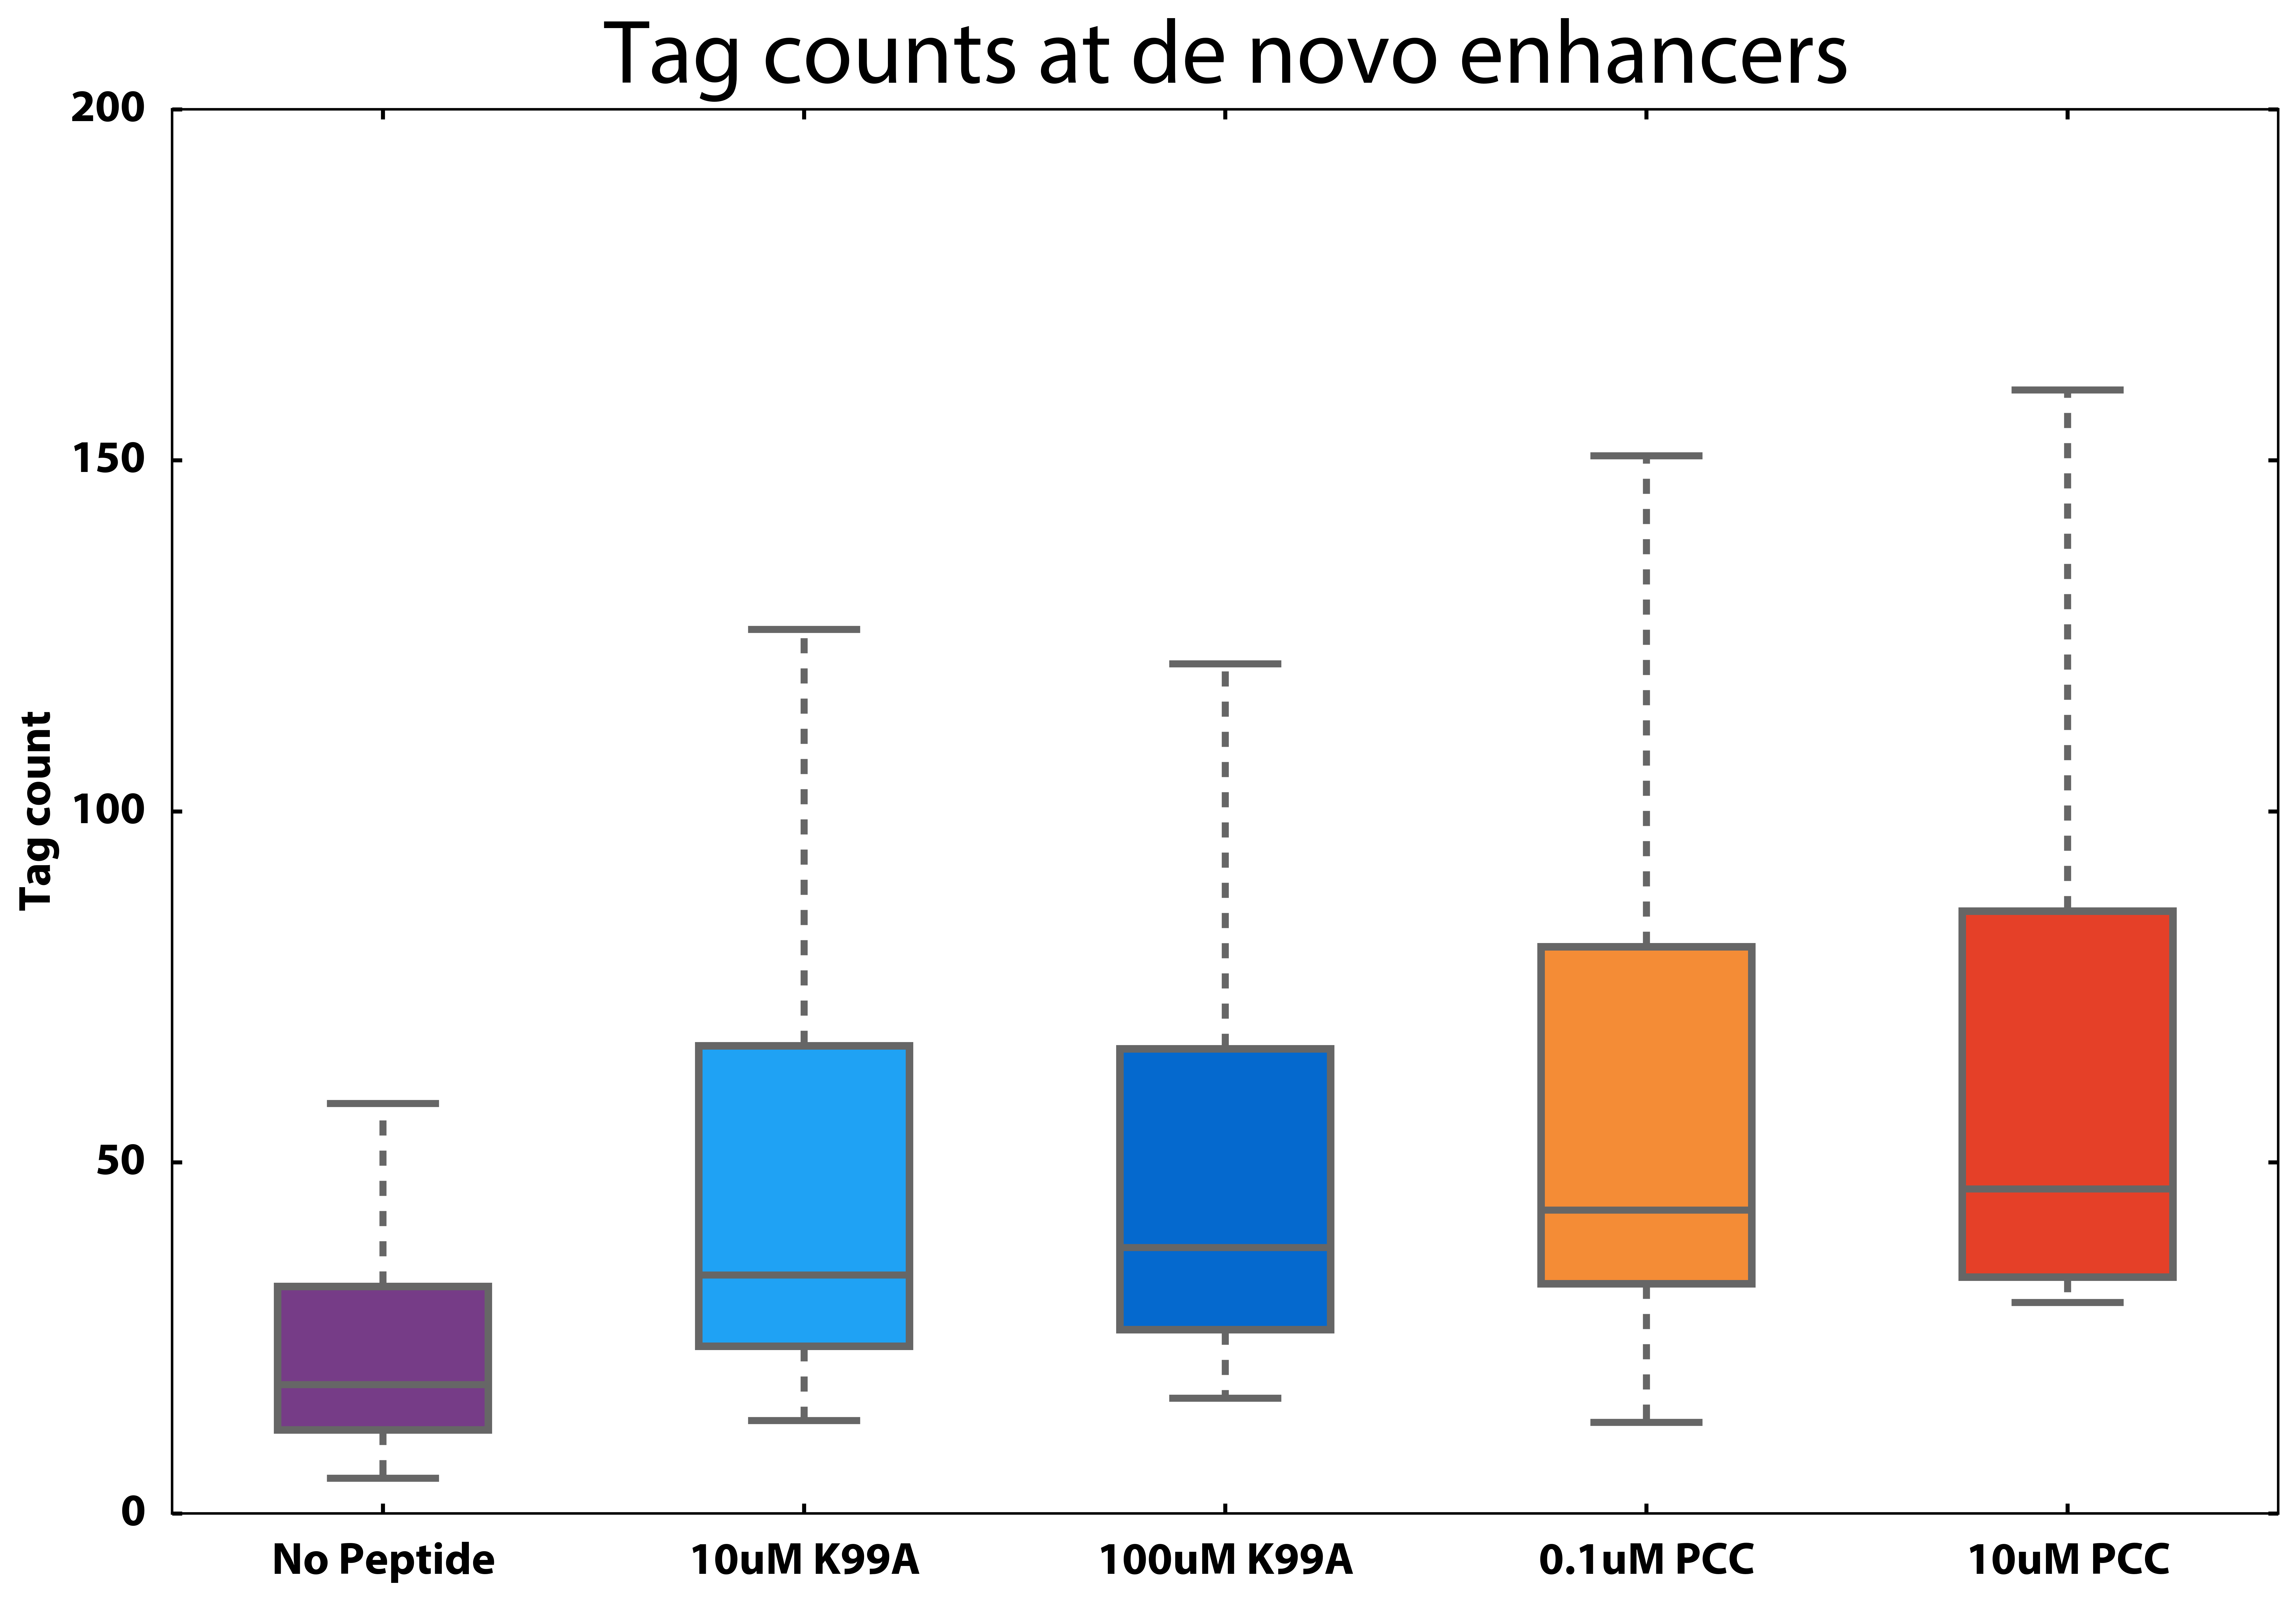

In [65]:
# Box plots of conditions
bp = plt.boxplot([denovo[label] for label in labels], patch_artist=True, sym='')

# Colors.
for i in range(0, len(labels)):
    outline_col = '#666666'
    plt.setp(bp['boxes'][i], edgecolor=outline_col)
    plt.setp(bp['boxes'][i], linewidth=3)
    plt.setp(bp['boxes'][i], facecolor=colorset[i])
    plt.setp(bp['medians'][i], color=outline_col)
    plt.setp(bp['whiskers'][i*2], color=outline_col)
    plt.setp(bp['whiskers'][i*2+1], color=outline_col)
    plt.setp(bp['caps'][i*2], color=outline_col)
    plt.setp(bp['caps'][i*2+1], color=outline_col)

    

plt.ylim([0,200])

plt.ylabel('Tag count')
plt.xticks(range(1,len(labels)+1), labels)

title = 'Tag counts at de novo enhancers'
plt.title(title, y=1.01)

plt.savefig('figures/{}'.format(title.replace(' ','_')),
            bbox_inches='tight')

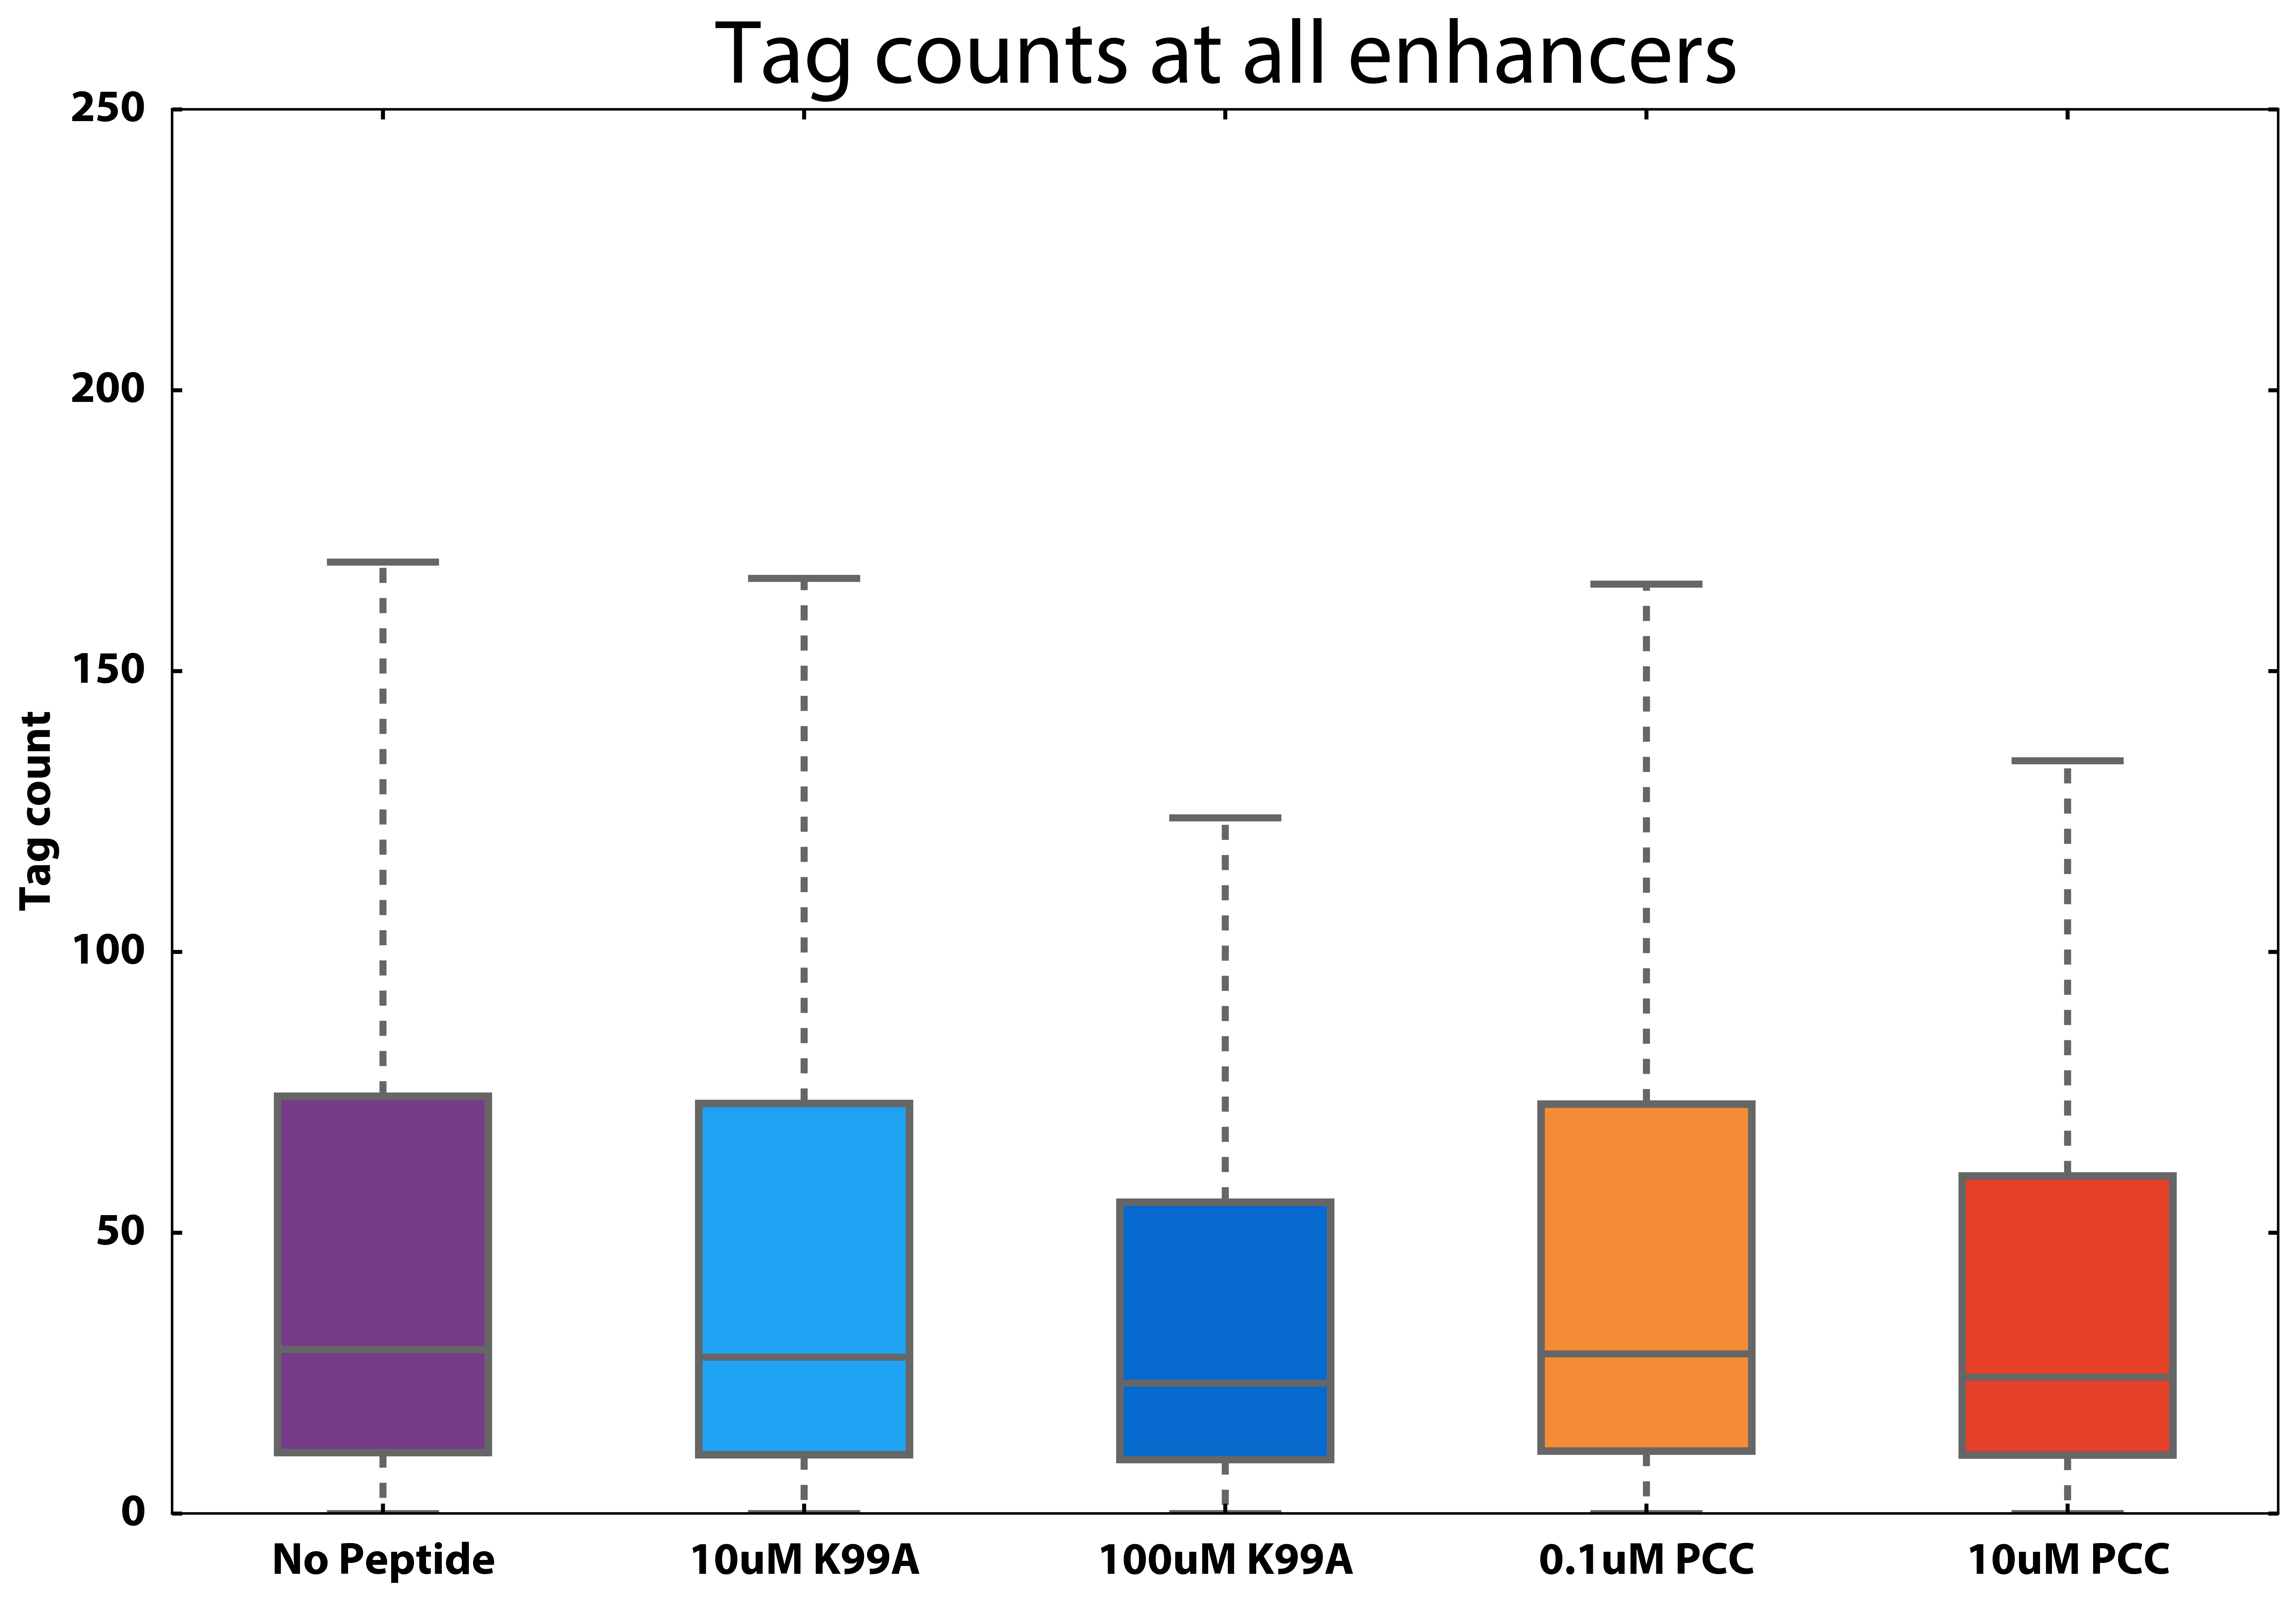

In [15]:
# Box plots of conditions
bp = plt.boxplot([data[label] for label in labels], patch_artist=True, sym='')

# Colors.
for i in range(0, len(labels)):
    outline_col = '#666666'
    plt.setp(bp['boxes'][i], edgecolor=outline_col)
    plt.setp(bp['boxes'][i], linewidth=3)
    plt.setp(bp['boxes'][i], facecolor=colorset[i])
    plt.setp(bp['medians'][i], color=outline_col)
    plt.setp(bp['whiskers'][i*2], color=outline_col)
    plt.setp(bp['whiskers'][i*2+1], color=outline_col)
    plt.setp(bp['caps'][i*2], color=outline_col)
    plt.setp(bp['caps'][i*2+1], color=outline_col)

    

plt.ylim([0,250])

plt.ylabel('Tag count')
plt.xticks(range(1,len(labels)+1), labels)

title = 'Tag counts at all enhancers'
plt.title(title, y=1.01)

plt.savefig('figures/{}'.format(title.replace(' ','_')),
            bbox_inches='tight')

In [16]:
# Do denovo show enrichment for top genes?
top_ct = sum(denovo['Gene Name'].isin(top_genes['gene_name']))
bottom_ct = sum(denovo['Gene Name'].isin(bottom_genes['gene_name']))
top_ct, bottom_ct

(102, 28)

In [18]:
'''
        de novo | existing
top        27        305-27
not top    178-27    len(genes)-(305-27)
'''
de_novo_not_top = len(denovo) - top_ct
existing_top = len(top_genes) - top_ct
existing_not_top = len(data['Gene Name'].unique())
scipy.stats.chi2_contingency([[top_ct, existing_top], 
                             [de_novo_not_top, existing_not_top]])

AttributeError: 'module' object has no attribute 'stats'

In [21]:
existing_not_top

11691

In [26]:
top_denovo = denovo[denovo['Gene Name'].isin(top_genes['gene_name'])]
top_denovo[top_denovo['Annotation'].str.startswith('Intergenic')]['Gene Name']

27408      Socs1
27424      Dusp5
28409    Uqcrfs1
28845      Spry1
29659       Pim1
29906      Spry1
30233      Nfkb1
30318     Tnfsf8
30377       Gzmb
Name: Gene Name, dtype: object

In [23]:
denovo.columns

Index(['PeakID (cmd=annotatePeaks.pl /data/mm10/CD4/ChIP/H3K4me2/AND-CD4TCell-ChIP-H3K4me2-All-Conditions-KAA-14-10-20/regions.txt mm10 -size given -d AND-CD4TCell-ChIP-H3K4me2-0_1uM-PCC-24h-Rep1-KAA-14-10-20 AND-CD4TCell-ChIP-H3K4me2-100uM-K99A-24h-Rep1-KAA-14-10-20 AND-CD4TCell-ChIP-H3K4me2-10uM-K99A-24h-Rep1-KAA-14-10-20 AND-CD4TCell-ChIP-H3K4me2-10uM-PCC-24h-Rep1-KAA-14-10-20 AND-CD4TCell-ChIP-H3K4me2-No-Peptide-24h-Rep1-KAA-14-10-20)', 'Chr', 'Start', 'End', 'Strand', 'Peak Score', 'Focus Ratio/Region Size', 'Annotation', 'Detailed Annotation', 'Distance to TSS', 'Nearest PromoterID', 'Entrez ID', 'Nearest Unigene', 'Nearest Refseq', 'Nearest Ensembl', 'Gene Name', 'Gene Alias', 'Gene Description', 'Gene Type', '0.1uM PCC', '100uM K99A', '10uM K99A', '10uM PCC', 'No Peptide'], dtype='object')